In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt

In [2]:
# Create path to CSV file
csv_path = "Metro_Interstate_Traffic_Volume.csv"
# Import the CSV into a pandas DataFrame
df = pd.read_csv(csv_path)

In [3]:
# Convert 'date_time' column to datetime data type
# and reset index
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [12]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year
date_time,,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012


In [4]:
#The 'date_time' column entry is the top of the hour for each row.  Holidays
#are denoted in the 'holiday' column, but are only noted for the first hour of that day
#at 00:00:00 (midnight), and the rest of the rows say "None" for that day, despite taking
#place during the holiday

# Forward fill the holiday column to propagate the holiday information for all hours of the day
df['holiday'] = df.groupby(df.index.date)['holiday'].ffill()


In [5]:
# Extract year from the datetime index and add 'year' column
df['year'] = df.index.year

# Group the data by year and holiday, and calculate the average traffic volume
average_holiday_volume_by_year = df.groupby(['year', 'holiday'])['traffic_volume'].mean()


In [6]:
average_holiday_volume_by_year

year  holiday                  
2012  Christmas Day                1603.280000
      Columbus Day                 3422.291667
      Thanksgiving Day             1974.416667
      Veterans Day                 2963.440000
2013  Christmas Day                1527.625000
      Columbus Day                 3369.153846
      Independence Day             2098.166667
      Labor Day                    2438.045455
      Memorial Day                 1966.958333
      New Years Day                1659.041667
      State Fair                   3865.291667
      Thanksgiving Day             2097.173913
      Veterans Day                 3211.086957
      Washingtons Birthday         3117.041667
2014  Martin Luther King Jr Day    2793.130435
      Memorial Day                 2097.833333
      New Years Day                1637.454545
      Washingtons Birthday         2471.875000
2015  Christmas Day                1559.250000
      Columbus Day                 3747.035714
      Independence Day      

In [8]:
# Group the data by holiday and calculate the overall average traffic volume for each holiday
overall_holiday_average = average_holiday_volume_by_year.groupby('holiday').mean()

# Display the result
print(overall_holiday_average)

holiday
Christmas Day                1735.638407
Columbus Day                 3454.577767
Independence Day             2183.695000
Labor Day                    2258.287092
Martin Luther King Jr Day    2726.546509
Memorial Day                 2091.891094
New Years Day                1847.484205
State Fair                   3832.456725
Thanksgiving Day             2072.075151
Veterans Day                 3263.422058
Washingtons Birthday         2892.695299
Name: traffic_volume, dtype: float64


<Axes: xlabel='Holiday', ylabel='Average Traffic Volume'>

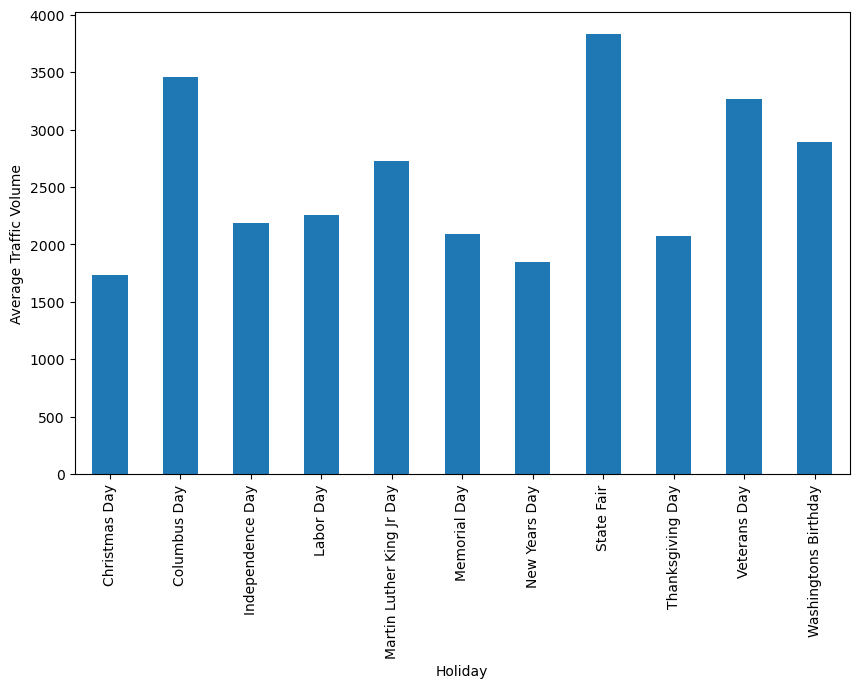

In [10]:
overall_holiday_average.plot(kind='bar', figsize=(10, 6), ylabel='Average Traffic Volume', xlabel='Holiday')
